**HRWorks supports several information technology (IT) companies in India with their talent acquisition. One of the challenges they face is about 30% of the candidates who accept the jobs offer do not join the company. This leads to huge loss of revenue and time asthe companies initiate the recruitment process again to fill the workforce demand.**

**HRWorks wants to find if a model can be built to predict the likelihood of a candidate joining the company**

# The Problem Statement for this Case Study is:

Based on the Case Study description, 30% of the candidates who accept the job offer do not join the company.
When we check the Target column of our data, it is found that about 19% of candidates who accepted the job offer did not join the company.

A solution needs to be found to minimize these losses as the losses may increase with the increase in candidates.
This can be done by primarily classifying the candidates based on their likelihood of joining using Machine Learning Classification Algorithms.

This will help HRWorks to prioritize candidates who are more likely to join the company.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
#os.chdir(r'C:\Users\Yogesh\Downloads\Dataset')
import graph_doc as g
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier

In [3]:
#reading data
os.chdir(r'C:\Users\Yogesh\Downloads\Dataset')
df= pd.read_csv("hr_Talent.csv")

# EDA

In [5]:
#datatype
df.dtypes

SLNO                             int64
Candidate Ref                    int64
DOJ Extended                    object
Duration to accept offer         int64
Notice period                    int64
Offered band                    object
Pecent hike expected in CTC    float64
Percent hike offered in CTC    float64
Percent difference CTC         float64
Joining Bonus                   object
Candidate relocate actual       object
Gender                          object
Candidate Source                object
Rex in Yrs                       int64
LOB                             object
Location                        object
Age                            float64
Status                          object
dtype: object

In [6]:
#shape of data
df.shape

(8995, 18)

In [7]:
#describing continues variable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SLNO,8995.0,5.970984e+03,3373.963454,1.00,3207.50,5976.0,8739.00,12333.00
Candidate Ref,8995.0,2.843647e+06,486344.774552,2109586.00,2386476.00,2807482.0,3300059.50,3836076.00
Duration to accept offer,8995.0,2.143446e+01,25.811616,0.00,3.00,10.0,33.00,224.00
Notice period,8995.0,3.929183e+01,22.220239,0.00,30.00,30.0,60.00,120.00
Pecent hike expected in CTC,8995.0,4.386480e+01,29.788975,-68.83,27.27,40.0,53.85,359.77
Percent hike offered in CTC,8995.0,4.065736e+01,36.064060,-60.53,22.09,36.0,50.00,471.43
Percent difference CTC,8995.0,-1.573802e+00,19.610729,-67.27,-8.33,0.0,0.00,300.00
Rex in Yrs,8995.0,4.239022e+00,2.547571,0.00,3.00,4.0,6.00,24.00
Age,8980.0,2.991203e+01,4.095699,20.00,27.00,29.0,34.00,60.00


In [8]:
#describing discrete variable
df.describe(include="object").T

,count,unique,top,freq
DOJ Extended,8995,2,No,4788
Offered band,8982,4,E1,5565
Joining Bonus,8995,2,No,8578
Candidate relocate actual,8995,2,No,7705
Gender,8995,2,Male,7444
Candidate Source,8995,3,Direct,4801
LOB,8995,9,INFRA,2850
Location,8995,11,Chennai,3150
Status,8995,2,Joined,7313


In [9]:
#finding null value
df.isnull().sum()

SLNO                            0
Candidate Ref                   0
DOJ Extended                    0
Duration to accept offer        0
Notice period                   0
Offered band                   13
Pecent hike expected in CTC     0
Percent hike offered in CTC     0
Percent difference CTC          0
Joining Bonus                   0
Candidate relocate actual       0
Gender                          0
Candidate Source                0
Rex in Yrs                      0
LOB                             0
Location                        0
Age                            15
Status                          0
dtype: int64

In [10]:
# missing value imputation with forward & mean imputation
df['Offered band'].fillna(method='ffill',inplace=True)
df['Age'].fillna(df.groupby('Gender')['Age'].transform('mean'), inplace = True) 

In [11]:
df.isnull().sum()

SLNO                           0
Candidate Ref                  0
DOJ Extended                   0
Duration to accept offer       0
Notice period                  0
Offered band                   0
Pecent hike expected in CTC    0
Percent hike offered in CTC    0
Percent difference CTC         0
Joining Bonus                  0
Candidate relocate actual      0
Gender                         0
Candidate Source               0
Rex in Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

In [12]:
#droping the used columns
df.drop('SLNO', axis=1, inplace=True)
df.drop(columns=['Candidate relocate actual'])

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,Female,Agency,7,ERS,Noida,34.0,Joined
1,2112635,No,18,30,E2,50.00,320.00,180.00,No,Male,Employee Referral,8,INFRA,Chennai,34.0,Joined
2,2112838,No,3,45,E2,42.84,42.84,0.00,No,Male,Agency,4,INFRA,Noida,27.0,Joined
3,2115021,No,26,30,E2,42.84,42.84,0.00,No,Male,Employee Referral,4,INFRA,Noida,34.0,Joined
4,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Male,Employee Referral,6,INFRA,Noida,34.0,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,3822427,No,4,0,E1,191.67,191.67,0.00,No,Male,Employee Referral,1,ERS,Chennai,34.0,Joined
8991,3828206,Yes,2,0,E1,150.00,150.00,0.00,No,Female,Direct,3,BFSI,Chennai,34.0,Joined
8992,3834159,No,0,0,E2,35.42,35.42,0.00,No,Male,Direct,5,INFRA,Noida,34.0,Joined
8993,3835433,No,0,30,E1,76.92,53.85,-13.04,No,Male,Direct,4,INFRA,Noida,34.0,Joined


In [13]:
#find the count values
print(df['DOJ Extended'].value_counts(),'\n')
print(df['LOB'].value_counts(),'\n')
print(df['Gender'].value_counts(),'\n')
print(df['Candidate Source'].value_counts(),'\n')
print(df['Location'].value_counts(),'\n')
print(df['Status'].value_counts(),'\n')

No     4788
Yes    4207
Name: DOJ Extended, dtype: int64 

INFRA         2850
ERS           2426
BFSI          1396
ETS            691
CSMP           579
AXON           568
EAS            346
Healthcare     124
MMS             15
Name: LOB, dtype: int64 

Male      7444
Female    1551
Name: Gender, dtype: int64 

Direct               4801
Agency               2585
Employee Referral    1609
Name: Candidate Source, dtype: int64 

Chennai      3150
Noida        2727
Bangalore    2230
Hyderabad     341
Mumbai        197
Gurgaon       146
Kolkata       129
Pune           48
Others         13
Cochin          8
Ahmedabad       6
Name: Location, dtype: int64 

Joined        7313
Not Joined    1682
Name: Status, dtype: int64 



Primary Observations From Statistical Summary

Duration to accept offer has a maximum value of 224 days and a median of 30 days. This looks absurd as no company gives about 8 months to make the decision

This dataset has inexperienced to highly experienced candidates having experience of up to 24 years.

We also have younger to old candidates up to 60 years of age group as well

A candidate got a Percent hike in CTC of exceptional 471% which is more than 100% of what was expected.

Most of the candidates were having job offers in Chennai

Almost all of the candidates were not given a Joining bonus

Most of the candidates are Males

About 81% of the candidates in this dataset have joined the company.

# Analysis

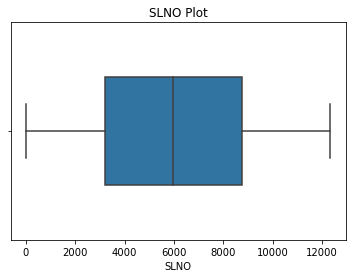

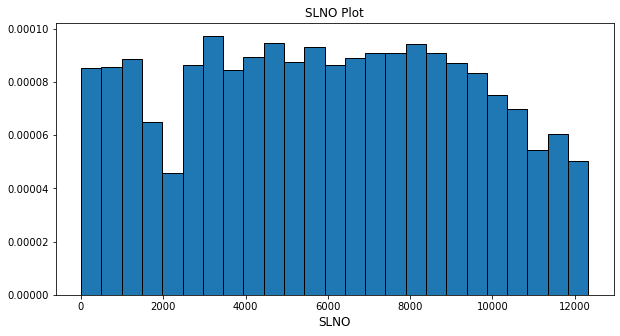

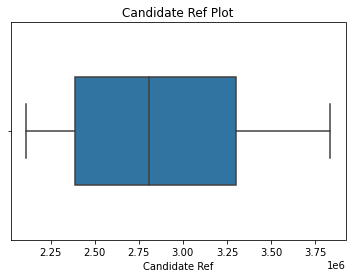

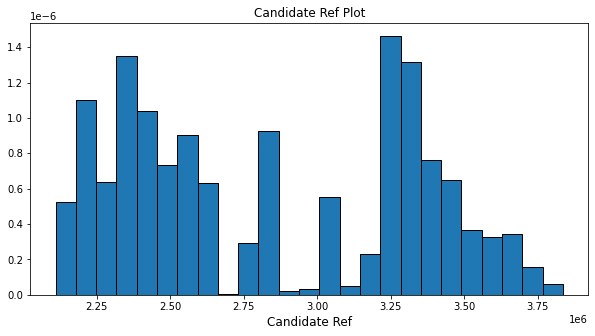

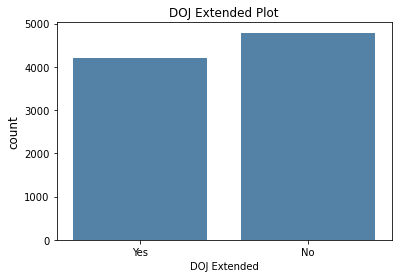

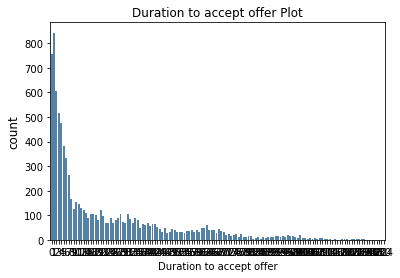

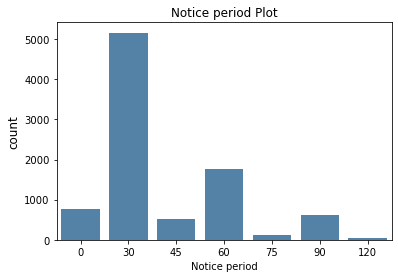

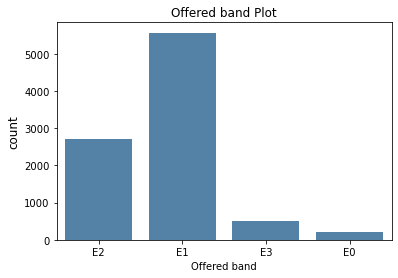

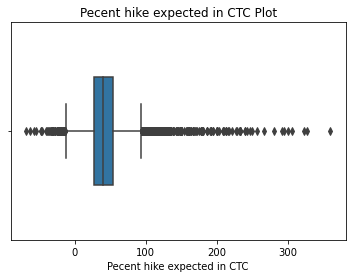

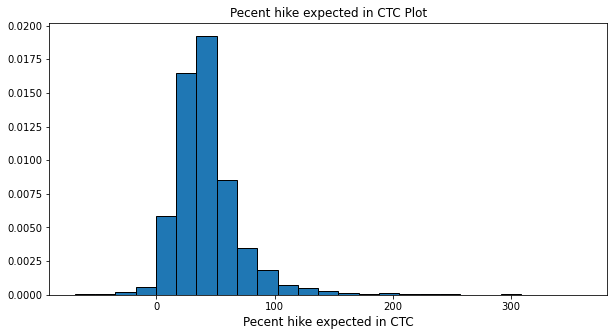

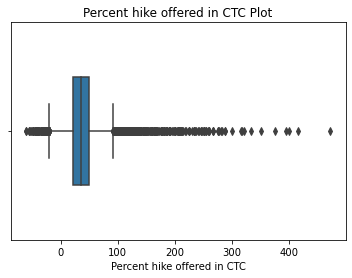

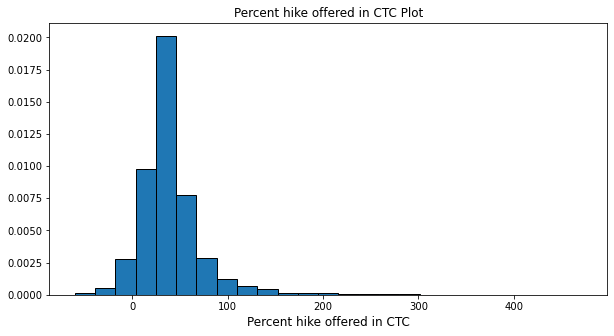

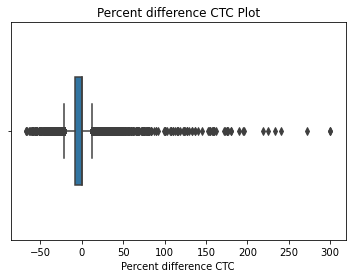

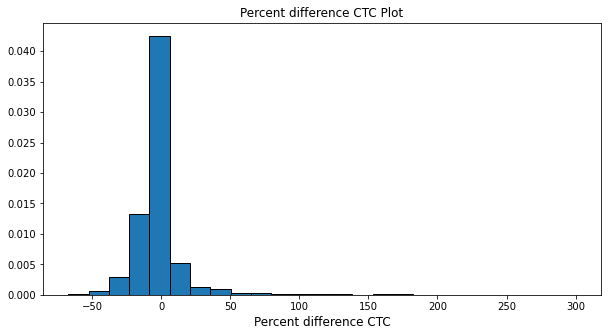

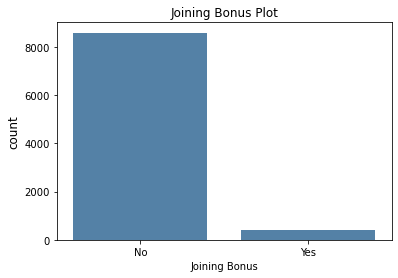

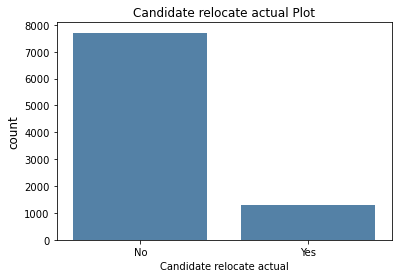

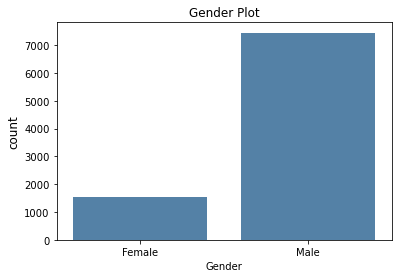

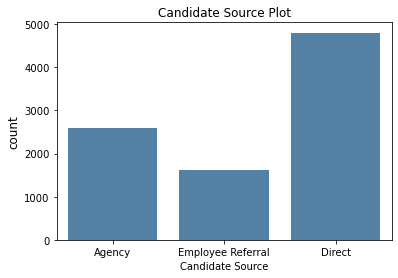

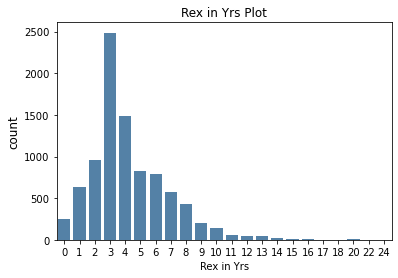

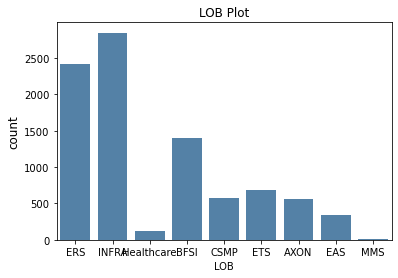

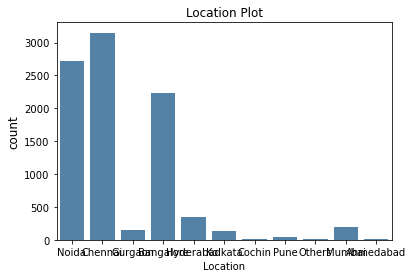

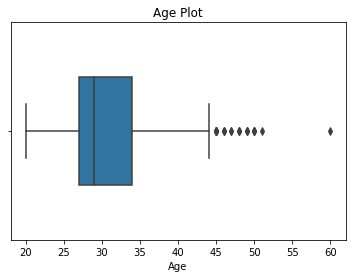

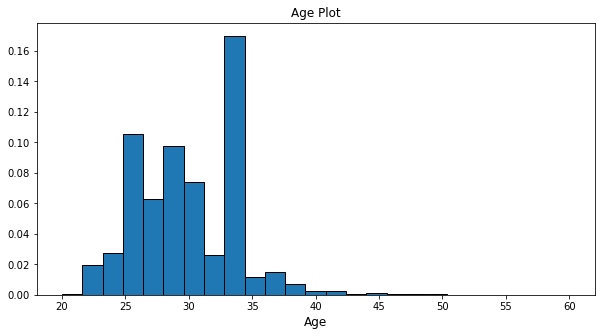

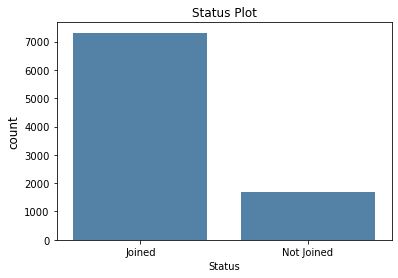

In [14]:
# graphs package
g.graphs("hr_Talent.csv",directory = r'C:\Users\Yogesh\Downloads\Dataset')

In [16]:
# to count get  of discrete caraible 
def count(col):
    return df[col].value_counts()

In [17]:
#barplot
def countp(x):
    plt.figure(figsize = (8,6))
    sns.countplot(x = x, data = df)

In [18]:
#Count Plot Function with hue as Target Variable for Bivariate Analysi
def plot_withY(label, dataset):
    
    plt.figure(figsize=(10,5))
    sns.countplot(x=label, data=df, hue="Status")
    plt.xticks(rotation=45)
    plt.show()

In [19]:
#count withrespect to y
def count_y(x):
    return df.groupby([x, 'Status'])[x].count()

Joined        81.3
Not Joined    18.7
Name: Status, dtype: float64


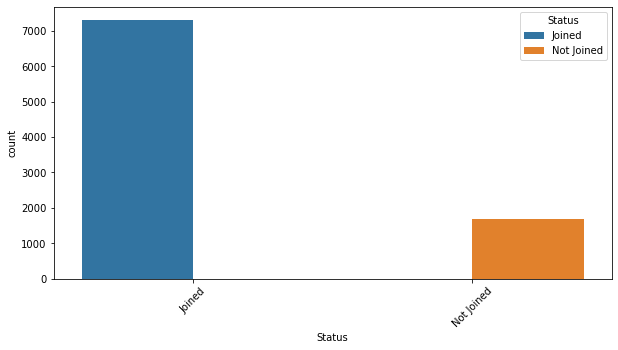

In [20]:
print(f'{round(df.Status.value_counts()/df.shape[0]*100,2)}')
plot_withY('Status',df)

**There are 81 % of candidate has joined 19% of them did not join.**

Gender  Status    
Female  Joined        1278
        Not Joined     273
Male    Joined        6035
        Not Joined    1409
Name: Gender, dtype: int64


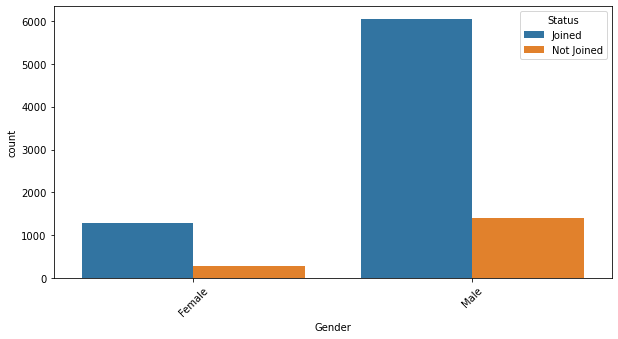

In [21]:
print(f"{count_y('Gender')}")
plot_withY('Gender', df)

**Male has Comparately higherJoining Ratio  than female Because the are relatively in  higher number**

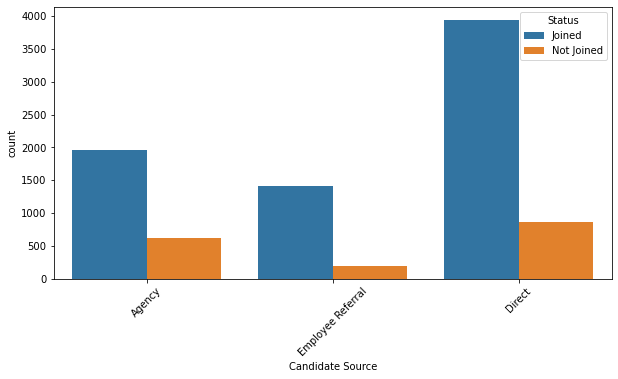

Candidate Source   Status    
Agency             Joined        1960
                   Not Joined     625
Direct             Joined        3937
                   Not Joined     864
Employee Referral  Joined        1416
                   Not Joined     193
Name: Candidate Source, dtype: int64


In [22]:
plot_withY('Candidate Source', df)
print(f"{count_y('Candidate Source')}")

Most of the candidates onboarded Directly by the firms

Number of candidates who did not join the company from the Direct channel is almost equal to those from Agency Channel even though candidates onboarded through Agency Channel is less

A reason behind this is, while applying through an agency, one gets multiple options of companies to apply, thus selecting the one that gives the best benefits
While a candidate onboarded directly has fewer or no options at the moment thus having less number who did not join.

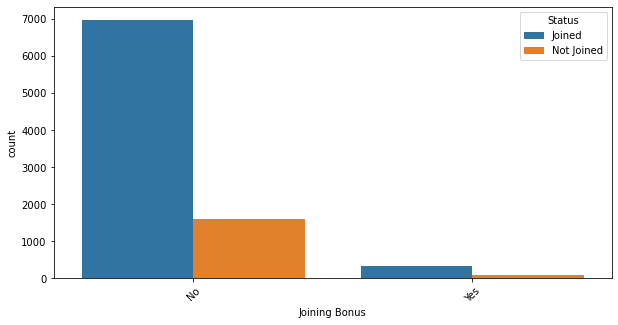

Joining Bonus  Status    
No             Joined        6977
               Not Joined    1601
Yes            Joined         336
               Not Joined      81
Name: Joining Bonus, dtype: int64


In [23]:
plot_withY('Joining Bonus', df)
print(f"{count_y('Joining Bonus')}")

DOJ Extended  Status    
No            Joined        3882
              Not Joined     906
Yes           Joined        3431
              Not Joined     776
Name: DOJ Extended, dtype: int64


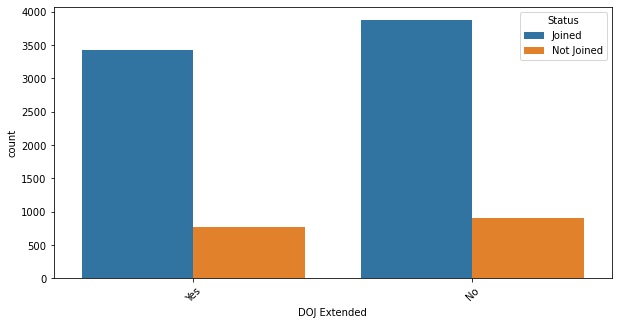

In [24]:
print(f"{count_y('DOJ Extended')}")
plot_withY('DOJ Extended',df)

E1    61.92
E2    30.11
E3     5.63
E0     2.35
Name: Offered band, dtype: float64


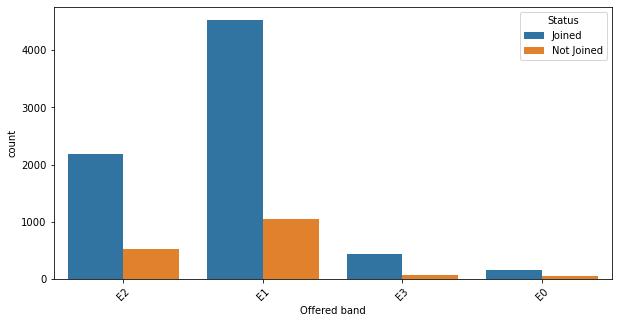

In [25]:
print(round(df['Offered band'].value_counts()/df.shape[0]*100,2))
plot_withY('Offered band',df)

Most of the candidates were offered E1 band followed by E2 and E3 and E4.

Since, most of them were offered E1, thus most of the candidates who did not join are also from E1

Thus, we can say that most of the candidates are freshers or having low experience level.

INFRA         31.68
ERS           26.97
BFSI          15.52
ETS            7.68
CSMP           6.44
AXON           6.31
EAS            3.85
Healthcare     1.38
MMS            0.17
Name: LOB, dtype: float64


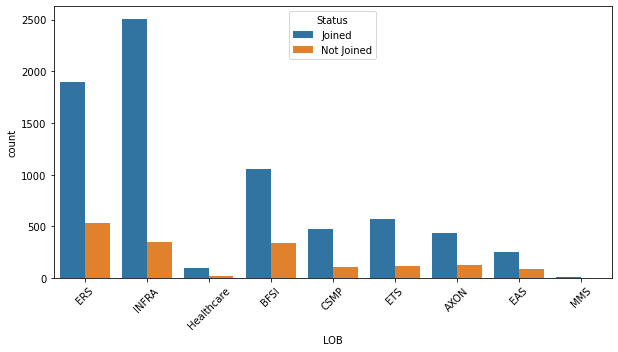

In [26]:
print(round(df['LOB'].value_counts()/df.shape[0]*100,2))
plot_withY('LOB',df)

Most of the candidates were offered jobs in the Infrastructure Line of Business

Then comes ERS followed by BFSI

Infra has twice more candidates than BFSI who joined but has almost equal numbers who did not join

This suggests that candidates are more likely to not join a BFSI firm.

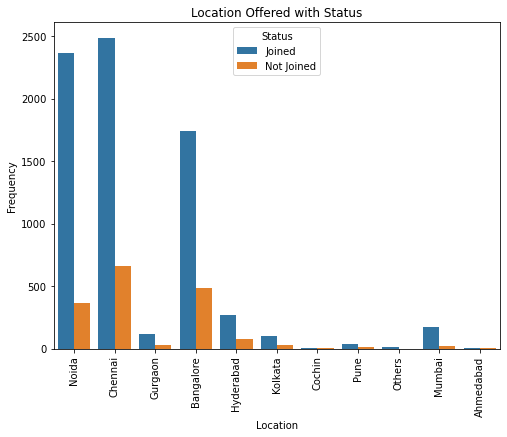

Location   Status    
Ahmedabad  Joined           5
           Not Joined       1
Bangalore  Joined        1742
           Not Joined     488
Chennai    Joined        2486
           Not Joined     664
Cochin     Joined           7
           Not Joined       1
Gurgaon    Joined         118
           Not Joined      28
Hyderabad  Joined         266
           Not Joined      75
Kolkata    Joined         100
           Not Joined      29
Mumbai     Joined         176
           Not Joined      21
Noida      Joined        2362
           Not Joined     365
Others     Joined          13
Pune       Joined          38
           Not Joined      10
Name: Location, dtype: int64


In [27]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'Location', data = df, hue = 'Status')
plt.xticks(rotation = 90)
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.title("Location Offered with Status")
plt.show()

print(count_y('Location'))

Chennai, Bangalore and Noida have maximum candidates in comparison to other cities.

Reason behind this is these cities are hubs of several top firms in India

Bangalore having less number of candidates than Noida has more candidates who didn't join the companies.

This suggests that these candidates must be getting better options as Bangalore houses many firms offices.

In [28]:
def plot_num(feature):
    sns.boxplot(data=df, x='Status', y = feature)
    plt.show()

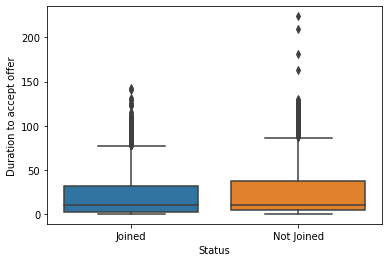

In [29]:
plot_num('Duration to accept offer')

The ones who did not join were given as high as 200 days to accept the offer

The candidate must be of greater importance to the company as no company offers a time span of 8 months to accept the offer

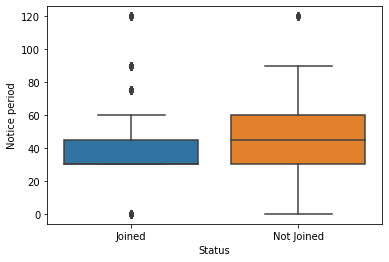

In [30]:
plot_num('Notice period')

Notice Period of a company varies ranging from 0 days to 120 days

Candidates who did not join were given more options of Notice Period starting from 0 days to about 90 days.

Mostly who joined were not given 0 days of the notice period (except one outlier)

This suggests that candidates who joined are less bothered about the notice period

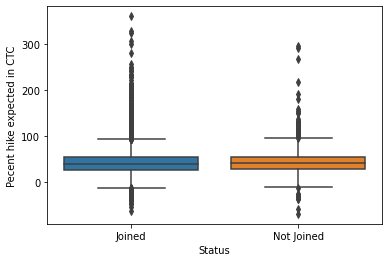

In [31]:
plot_num('Pecent hike expected in CTC')

Most of the candidates were expecting per cent hike in CTC of about 50%

A few candidates were expecting a per cent hike more than 300%

But we cannot comment on this, as they might have changed the position or department or had been assigned a managerial post

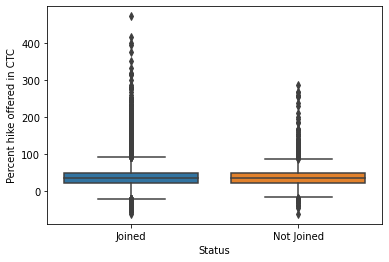

In [32]:
plot_num('Percent hike offered in CTC')

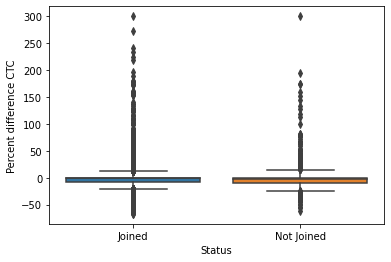

In [33]:
plot_num('Percent difference CTC')

Percent difference CTC can produce same observations as those from Percent hike expected and Percent hike offered features

A lot of Percent difference in this feature is incorrect, thus we will remove them in Outlier Analysis

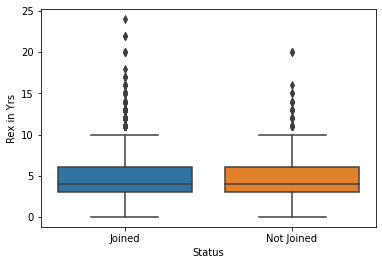

In [34]:
plot_num('Rex in Yrs')

Most of the Candidates were having 0 to 8 years of experience

We also have candidates having experience of 25 years and more

Experience candidates are more likely to join

As experienced people understand the work ethics of the corporate world, they don't want to exploit them

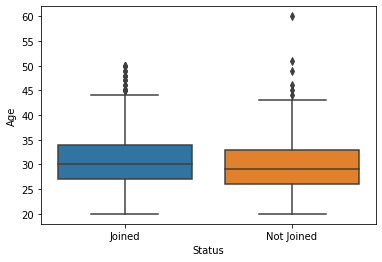

In [35]:
plot_num('Age')

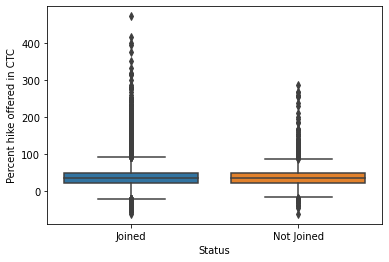

In [36]:
plot_num('Percent hike offered in CTC')

Looks like what candidates were expecting got a little less of per cent hike

This makes sense as candidates always aspire more than the calibre

We have few candidates who were offered a high per cent hike in CTC which can be related to those candidates who were expecting these hikes

This strongly suggests that these set of candidates had applied for a managerial level or equivalent positions

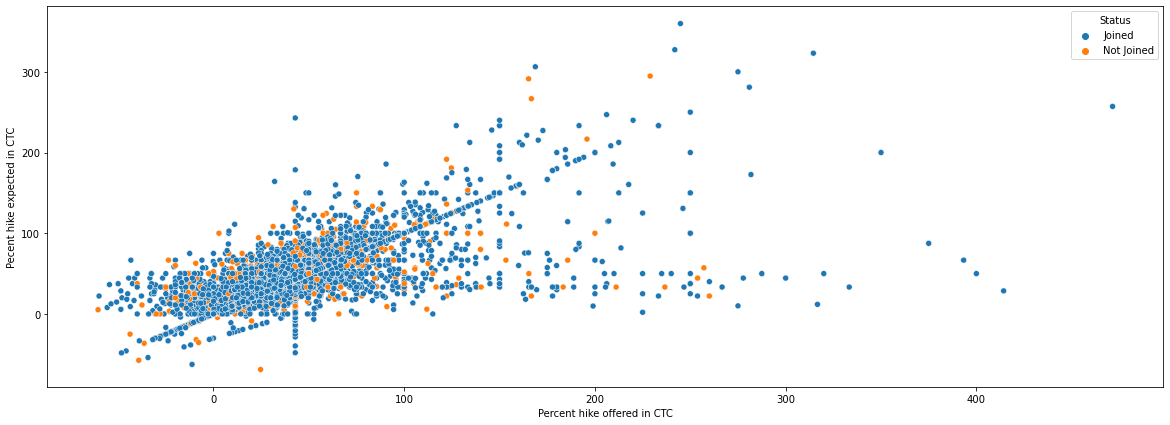

In [37]:
#scatterplot W.r.t status,hiike expected & offered
plt.figure(figsize=(20,7))

sns.scatterplot(x= 'Percent hike offered in CTC', y= 'Pecent hike expected in CTC', hue='Status', data=df)

plt.show()

We can see that there is an increasingly linear relation between the expected and offered ctc among the joined candidates.

<AxesSubplot:>

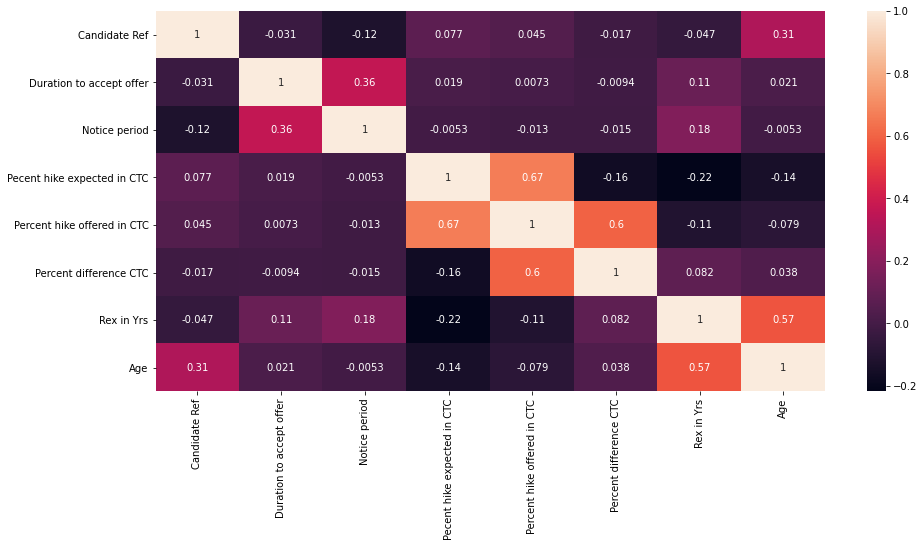

In [38]:
#correleation heat map
plt.figure(figsize = (15,7))

sns.heatmap(df.corr(), annot = True)

EDA Conclusions

Data is imbalance thus it needs to be treated adequately.

Most of the candidates are Male and that is why more number of candidates who didn't join are Males

Chennai, Bangalore and Noida have maximum candidates in comparison to other cities. This suggests that these candidates must be getting better options as Bangalore houses many firms offices.

Almost 50% of the candidates were offered to extend the Date of Joining While the other half were not offered the same

Most of the candidates were offered E1 band followed by E2 and E3 and E4. Since, most of them were offered E1, thus most of the candidates who did not join are also from E1.

Most of the candidates were offered jobs in the Infrastructure Line of Business and Infra has twice more candidates than BFSI who joined but has almost equal numbers who did not join. This suggests that candidates are more likely to not join a BFSI firm.

Number of candidates who did not join the company from the Direct channel is almost equal to those from Agency Channel even though candidates onboarded through Agency Channel is less. A reason behind this is, while applying through an agency, one gets multiple options of companies to apply, thus selecting the one that gives the best benefits

The ones who were required to relocate, all of them joined.

Most of the candidates were of age 22 years to 35 years. It can be observed that the 60 years old candidate did not join. It seems like an error in input as generally people get retired at the age of 60

Most of the candidates were expecting percent hike in CTC of about 50% while a few candidates were expecting a percent hike more than 300% but

Candidates who were expecting got a little less of percent hike. We also see few candidates who were offered a high per cent hike in CTC which can be related to those candidates who were expecting these hikes.

Most of the Candidates were having 0 to 8 years of experience. Experience candidates are more likely to join as experienced people understand the work ethics of the corporate world.

Notice Period of a company varies ranging from 0 days to 120 days. Candidates who did not join were given more options of Notice Period starting from 0 days to about 90 days while mostly who joined were not given 0 days of the notice period (except one outlier). This suggests that candidates who joined are less bothered about the notice period.

When we plot age we can see that there are some outliers. But among the candidates who did not choose to join, we can see that there are some extreme outlier towards the age 60. So, there are chances that age affects our target variable.

When we consider years of experience, we can see some extreme outliers among the candidates who joined. We can assume that there is slight effect by years of experience on target variable.

# VIF

In [39]:
X = df[['Duration to accept offer','Notice period','Percent hike offered in CTC','Age',
        'Pecent hike expected in CTC']]
vif = pd.DataFrame()
vif["VIF Value"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Value,features
0,1.949755,Duration to accept offer
1,4.541062,Notice period
2,4.108396,Percent hike offered in CTC
3,5.551770,Age
4,5.509198,Pecent hike expected in CTC


**Labeling joined as 1 & 0 for not not joined**

In [40]:
df['Status'] = df['Status'].map(lambda x:1 if x=='Joined' else 0)

**LabelEncoder for Offered band**

In [41]:
labenc = LabelEncoder()
df['Offered band'] = labenc.fit_transform(df['Offered band'])

In [44]:
x_feature = list(df.columns)
x_feature.remove('Status')
encoded_data = pd.get_dummies(df[x_feature], drop_first = True) 
y = df['Status']
x = encoded_data

In [45]:
#catagorizing the feature
a = x[['Duration to accept offer','Notice period','Pecent hike expected in CTC','Percent hike offered in CTC',
   'Percent difference CTC','Rex in Yrs','Age']]
b = x.drop(x[['Duration to accept offer','Notice period','Pecent hike expected in CTC','Percent hike offered in CTC',
   'Percent difference CTC','Rex in Yrs','Age','Candidate Ref']],axis = 1)

In [47]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(a)
X = pd.DataFrame(scaler.fit_transform(a),index=a.index,columns=a.columns)


In [48]:
x_scale = pd.concat([X, b], axis = 1)
x_scale

,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age,Offered band,DOJ Extended_Yes,Joining Bonus_Yes,Candidate relocate actual_Yes,Gender_Male,Candidate Source_Direct,Candidate Source_Employee Referral,LOB_BFSI,LOB_CSMP,LOB_EAS,LOB_ERS,LOB_ETS,LOB_Healthcare,LOB_INFRA,LOB_MMS,Location_Bangalore,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune
0,-0.288044,-0.418193,-2.170548,-0.762501,2.265916,1.083829,0.998974,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.133066,-0.418193,0.205967,7.746165,9.259416,1.476382,0.998974,2,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,-0.714232,0.256905,-0.034404,0.060525,0.080257,-0.093829,-0.711643,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0.176889,-0.418193,-0.034404,0.060525,0.080257,-0.093829,0.998974,2,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,-0.791721,3.632394,-0.042797,0.053592,0.080257,0.691277,0.998974,2,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,-0.675488,-1.768388,4.962017,4.187577,0.080257,-1.271487,0.998974,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8991,-0.752977,-1.768388,3.563100,3.032069,0.080257,-0.486381,0.998974,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8992,-0.830465,-1.768388,-0.283503,-0.145232,0.080257,0.298724,0.998974,2,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
8993,-0.830465,-0.418193,1.109707,0.365832,-0.584723,-0.093829,0.998974,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


**Model 1**

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_scale,y,train_size=0.7,stratify=y , random_state = 42)

In [51]:
log_reg=LogisticRegression(max_iter=55,solver= "newton-cg")
log_reg.fit(x_train,y_train)
y_pred = log_reg.predict(x_test)
log_reg.predict_proba(x_test)

array([[0.00571585, 0.99428415],
       [0.00396919, 0.99603081],
       [0.08011848, 0.91988152],
       ...,
       [0.26727692, 0.73272308],
       [0.01251469, 0.98748531],
       [0.24036385, 0.75963615]])

In [52]:
print('confusion matrix :')
print(f'{metrics.confusion_matrix(y_test,y_pred)}','\n\n')
print(f'Accuracy : {metrics.accuracy_score(y_test,y_pred)}','\n\n')
print(f'{metrics.classification_report(y_test, y_pred)}','\n','\n')

confusion matrix :
[[  34  471]
 [  28 2166]] 


Accuracy : 0.8151167098925528 


              precision    recall  f1-score   support

           0       0.55      0.07      0.12       505
           1       0.82      0.99      0.90      2194

    accuracy                           0.82      2699
   macro avg       0.68      0.53      0.51      2699
weighted avg       0.77      0.82      0.75      2699
 
 



**Model 2**

In [53]:
x_feature = list(df.columns)
x_feature.remove('Status')
encoded_data = pd.get_dummies(df[x_feature], drop_first = True) 
y = df['Status']
x = encoded_data
x = x.drop(['Candidate Ref'],axis = 1)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_scale,y,train_size=0.7,stratify=y , random_state = 42)

In [55]:
dtc = DecisionTreeClassifier()
param = [{'max_depth': list(range(10, 18)), 'max_features': list(range(0,10))}]
clf_dtc = GridSearchCV(dtc, cv = 3, param_grid = param, scoring = 'accuracy')
clf_dtc.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14, 15, 16, 17],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             scoring='accuracy')

In [56]:
print(metrics.classification_report(y_test, clf_dtc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.46      0.24      0.31       505
           1       0.84      0.93      0.89      2194

    accuracy                           0.80      2699
   macro avg       0.65      0.59      0.60      2699
weighted avg       0.77      0.80      0.78      2699



In [60]:
print(f'{metrics.confusion_matrix(y_test,y_pred)}','\n\n')


[[  34  471]
 [  28 2166]] 




The model basically predict on overall accruracy of 81% but it cound'nt not joiner properly i think it is because of mablaced in data the not joiner is 1/4 of joiner with even though i did stratified sampling it did help me much.

Upsampling the Data

Since the target variable is imbalanced, the model will produce biased results, thus we need to resample the data

Here we are using Upsampling technique SMOTE to upsample the data

**Model 3**

In [61]:
x_feature = list(df.columns)
x_feature.remove('Status')
encoded_data = pd.get_dummies(df[x_feature], drop_first = True) 
#y = df['Status']
x = encoded_data
x = x.drop(['Candidate Ref','Percent difference CTC'],axis = 1)
y = df['Status']

In [62]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)
x_scale

array([[-0.28804384, -0.41819285,  0.96754393, ...,  1.51607932,
        -0.03804391, -0.07324566],
       [-0.13306623, -0.41819285,  0.96754393, ..., -0.65959609,
        -0.03804391, -0.07324566],
       [-0.71423225,  0.25690491,  0.96754393, ...,  1.51607932,
        -0.03804391, -0.07324566],
       ...,
       [-0.83046545, -1.76838837,  0.96754393, ...,  1.51607932,
        -0.03804391, -0.07324566],
       [-0.83046545, -0.41819285, -0.61886833, ...,  1.51607932,
        -0.03804391, -0.07324566],
       [-0.75297665, -1.76838837, -0.61886833, ..., -0.65959609,
        -0.03804391, -0.07324566]])

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size = 0.3, random_state = 42)

In [68]:
sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

In [70]:
sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

In [71]:
logreg = LogisticRegression()

In [72]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.69      0.41       518
           1       0.89      0.61      0.72      2181

    accuracy                           0.63      2699
   macro avg       0.59      0.65      0.57      2699
weighted avg       0.78      0.63      0.66      2699



In [73]:
print(f'{metrics.confusion_matrix(y_test, y_pred)}')

[[ 356  162]
 [ 850 1331]]


**Model 4**

In [74]:
dtc = DecisionTreeClassifier()
param = [{'max_depth': list(range(10, 18)), 'max_features': list(range(0,20))}]
clf_dtc = GridSearchCV(dtc, cv = 3, param_grid = param, scoring = 'accuracy')
clf_dtc.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14, 15, 16, 17],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13, 14, 15, 16, 17, 18, 19]}],
             scoring='accuracy')

In [75]:
print(metrics.classification_report(y_test, clf_dtc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.36      0.41      0.38       518
           1       0.85      0.83      0.84      2181

    accuracy                           0.75      2699
   macro avg       0.61      0.62      0.61      2699
weighted avg       0.76      0.75      0.75      2699



In [76]:
print(f'{metrics.confusion_matrix(y_test,clf_dtc.predict(x_test))}','\n\n')

[[ 212  306]
 [ 377 1804]] 




**Random forestForest & Bagging Techinique**

**BG model 1**

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [79]:
sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

In [80]:
rfc = RandomForestClassifier()
forest_params = forest_params = [{'max_depth': list(range(10, 18))}]
clf_rfc = GridSearchCV(rfc, cv = 10,param_grid = forest_params,scoring = 'roc_auc')
clf_rfc.fit(x_train_sm, y_train_sm,)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14, 15, 16, 17]}],
             scoring='roc_auc')

In [81]:
print(metrics.classification_report(y_test,clf_rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.44      0.26      0.33       518
           1       0.84      0.92      0.88      2181

    accuracy                           0.80      2699
   macro avg       0.64      0.59      0.60      2699
weighted avg       0.76      0.80      0.77      2699



In [82]:
import sklearn.ensemble as en
bg = en.BaggingClassifier(DecisionTreeClassifier(),n_estimators=100,n_jobs= - 1)
bg.fit(x_train_sm,y_train_sm)
y_test = pd.DataFrame(y_test)
bg.score(x_test,y_test)
print(metrics.classification_report(y_test,bg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.43      0.25      0.31       518
           1       0.84      0.92      0.88      2181

    accuracy                           0.79      2699
   macro avg       0.64      0.58      0.60      2699
weighted avg       0.76      0.79      0.77      2699



Predictive Analysis Conclusions

To predict the joiner accurately with the given data we can go with BG Model 1

even though bagging technique helped me to improve the overall accuracy to 81 but my aim is to increase the recall of the True positive to find non joiners

To predict the Non-joiner accurately with the given data we can go with Model 3 becasue it accuracry of almost 70%

The damage the caused by Non-joiner is more than Joiners other as per business need i would go with model 3